In [ ]:
NAME = "AHASAN HABIB"
ID = "24141256"
COLLABORATORS_ID = "24141261"

# Necessary library import

In [49]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb


# Task 1 - Basic Image Operation

import your image or any photo taken by you (`sample.jpeg`) as a numpy array, save it in the varaible `I`.

A picture taken from your phone of any scenary/streets/building is better.

remember your image name MUST be `sample.jpeg`.

Make sure the height and the width of the image is **smaller than 1000 pixels**.

In [24]:
I = None # Replace None with appropriate function call line


# find the height and the width of the image
H = None # should contain height
W = None # should contain width

### BEGIN SOLUTION
I = io.imread("/content/sample.jpg")
H, W = I.shape[:2]
print("Height is", H)
print("Width is", W)

### END SOLUTION

Height is 360
Width is 506


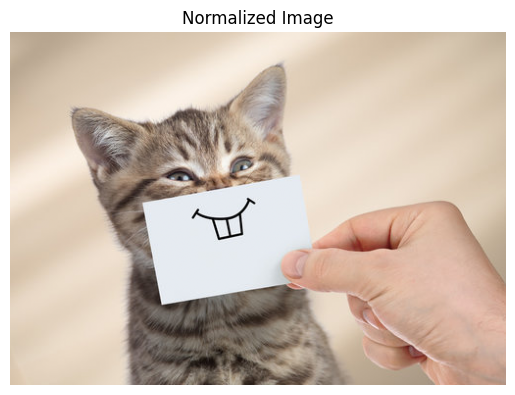

In [25]:
# Normalize the image so that the gray scales are between 0 and 1. Save it to I and display the image

I = I / 255
### BEGIN SOLUTION
plt.imshow(I)
plt.title("Normalized Image")
plt.axis('off')
plt.show()
### END SOLUTION

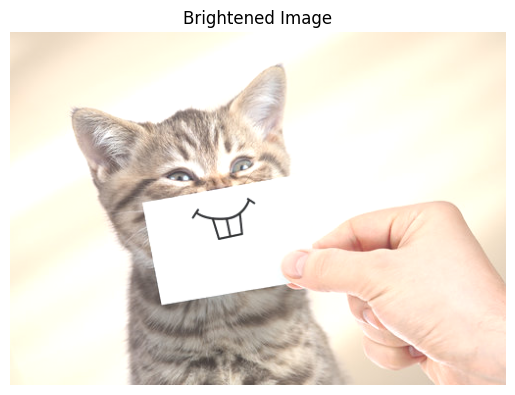

In [27]:
# Increase the brightness of the image without changing the contrast.
# Save the resulting image in I_bright and display it.
I_bright = None

### BEGIN SOLUTION
I_bright = np.clip(I + 0.2, 0, 1)
plt.imshow(I_bright)
plt.title("Brightened Image")
plt.axis('off')
plt.show()
### END SOLUTION

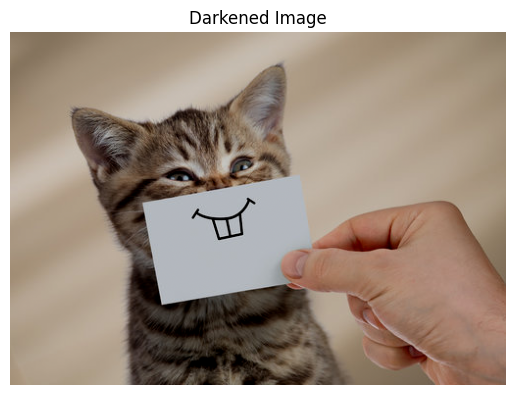

In [29]:
# Decrease the brightness of the image without changing the contrast.
# Save the resulting image in I_dark and display it.
I_dark = None

### BEGIN SOLUTION
I_dark = np.clip(I - 0.2, 0, 1)
plt.imshow(I_dark)
plt.title("Darkened Image")
plt.axis('off')
plt.show()
### END SOLUTION

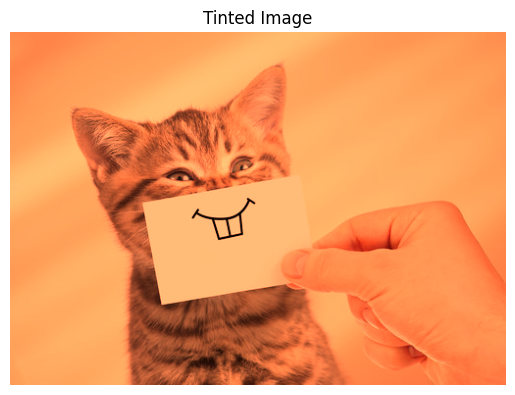

In [30]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift
I_tint = None

# HINT:
# I_tint = np.zeros(I.shape)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......

### BEGIN SOLUTION
I_tint = np.zeros(I.shape)
I_tint[:, :, 0] = I[:, :, 0] * 1.5  # Red channel
I_tint[:, :, 1] = I[:, :, 1] * 0.8  # Green channel
I_tint[:, :, 2] = I[:, :, 2] * 0.5  # Blue channel
plt.imshow(I_tint)
plt.title("Tinted Image")
plt.axis('off')
plt.show()
### END SOLUTION

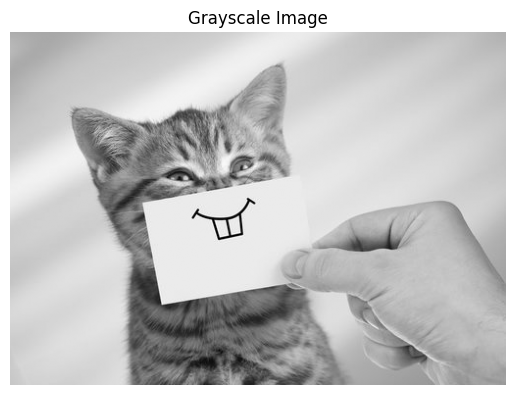

In [31]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it
I_gray = None

### BEGIN SOLUTION
I_gray = color.rgb2gray(I)
plt.imshow(I_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

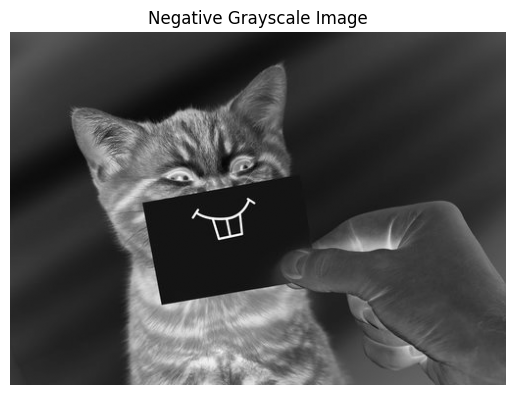

In [32]:
# Display the negative of the grayscale image

### BEGIN SOLUTION
I_negative = 1 - I_gray
plt.imshow(I_negative, cmap='gray')
plt.title("Negative Grayscale Image")
plt.axis('off')
plt.show()
### END SOLUTION

<ipython-input-33-993a6feedc1f>:12: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_degraded, cmap="gray")


(-0.5, 505.5, 359.5, -0.5)

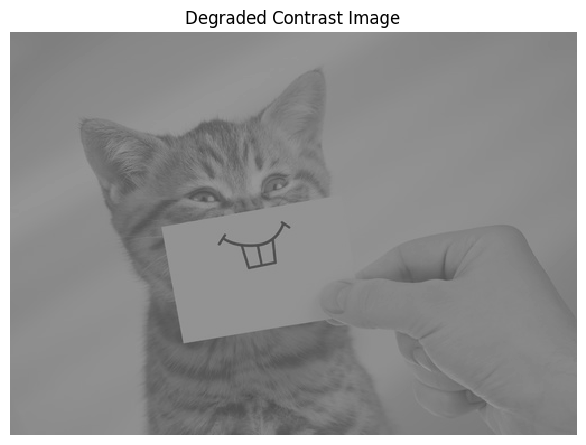

In [33]:
# Artificially degrade the **grayscale image** by reducing it contrast
# You can do so by recaling the gray values and concentrating them in a narrow range,
# say between 0.3 and 0.6.
# Save the image as I_degraded and display it
# HINT: SEE lec-4-demo-codes

I_degraded = None

### BEGIN SOLUTION
I_degraded = 0.3 + 0.3 * (I_gray - np.min(I_gray)) / (np.max(I_gray) - np.min(I_gray))
plt.figure()
io.imshow(I_degraded, cmap="gray")
plt.title("Degraded Contrast Image")
plt.axis("off")
### END SOLUTION

In [37]:
# Complete the following function to perform Piecewise Linear Contrast stretching
# That is, implement the map shown in Slide 17 of Lecture 3

# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1
def piecewise_contrast_stretch(I, r1, r2, s1, s2):
    I_stretched = np.zeros_like(I)

    I_stretched[I < r1] = (s1 / r1) * I[I < r1]
    I_stretched[(I >= r1) & (I <= r2)] = ((s2 - s1) / (r2 - r1)) * (I[(I >= r1) & (I <= r2)] - r1) + s1
    I_stretched[I > r2] = ((1 - s2) / (1 - r2)) * (I[I > r2] - r2) + s2

    return I_stretched

    ### END SOLUTION



<ipython-input-39-799f40b0e379>:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_stretched, cmap="gray")


(-0.5, 505.5, 359.5, -0.5)

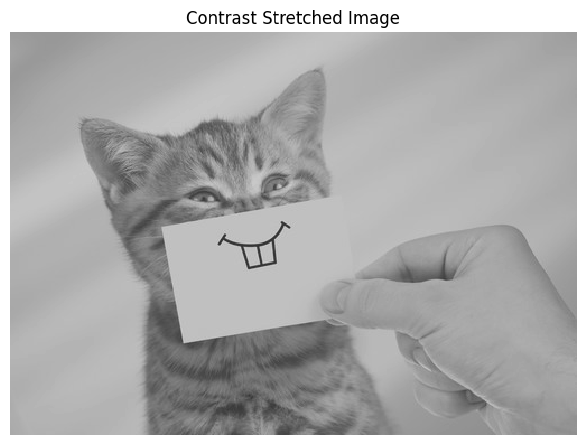

In [39]:
# To test your implementation, contrast strech the degraded image I_degrade
r1 = 0.3
r2 = 0.6
s1 = 0.2
s2 = 0.8
I_stretched = piecewise_contrast_stretch(I_degraded.copy(), r1, r2, s1, s2)
plt.figure()
io.imshow(I_stretched, cmap="gray")
plt.title("Contrast Stretched Image")
plt.axis("off")
### BEGIN SOLUTION

### END SOLUTION

# Task 2 - Histogram and Equalization

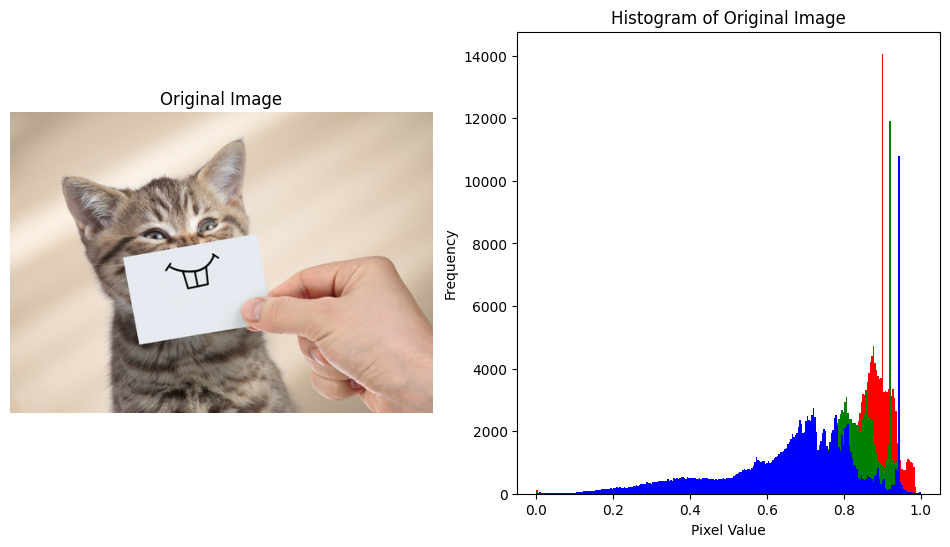

In [40]:
# Plot the Image and its histogram + cdf of the original image I
# Note that it is a color image, so it will have three different histograms

### BEGIN SOLUTION
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(I)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
colors = ('red', 'green', 'blue')
for i, color in enumerate(colors):
    plt.hist(I[:, :, i].ravel(), bins=256, range=(0, 1), color=color)
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()
### END SOLUTION

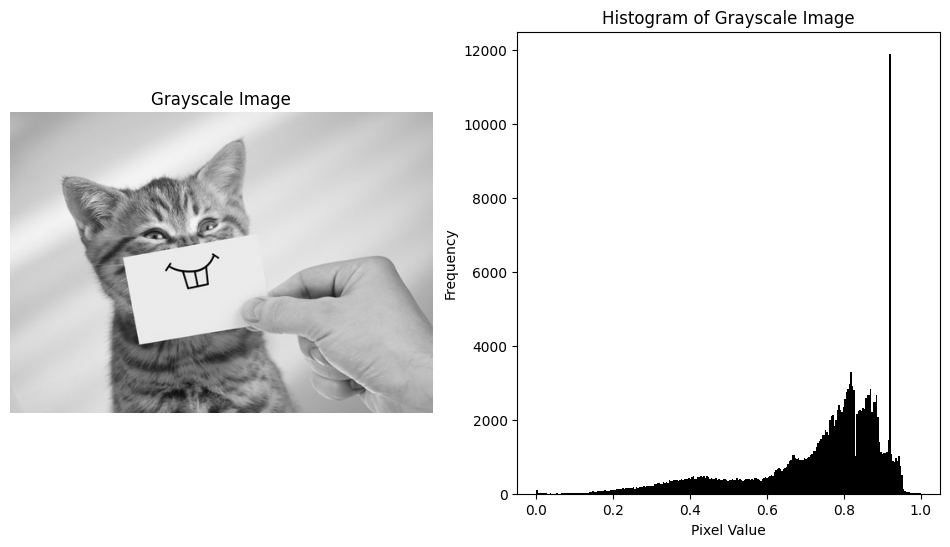

In [41]:
# Plot the Image and its histogram + cdf of the grayscale image I_gray

### BEGIN SOLUTION
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(I_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(I_gray.ravel(), bins=256, range=(0, 1), color='black')
plt.title("Histogram of Grayscale Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()
### END SOLUTION

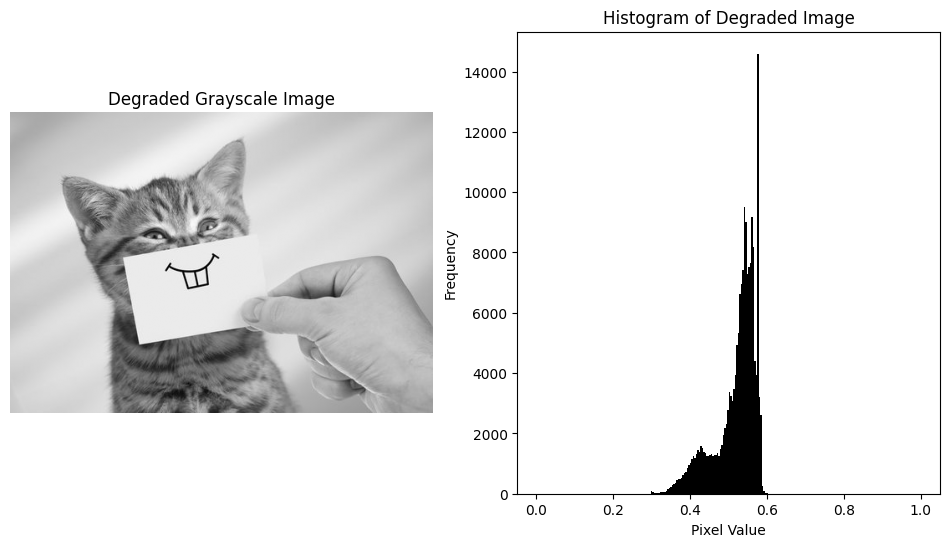

In [42]:
# Plot the Image and its histogram + cdf of the degraded image I_degraded

### BEGIN SOLUTION
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(I_degraded, cmap='gray')
plt.title("Degraded Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(I_degraded.ravel(), bins=256, range=(0, 1), color='black')
plt.title("Histogram of Degraded Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()
### END SOLUTION

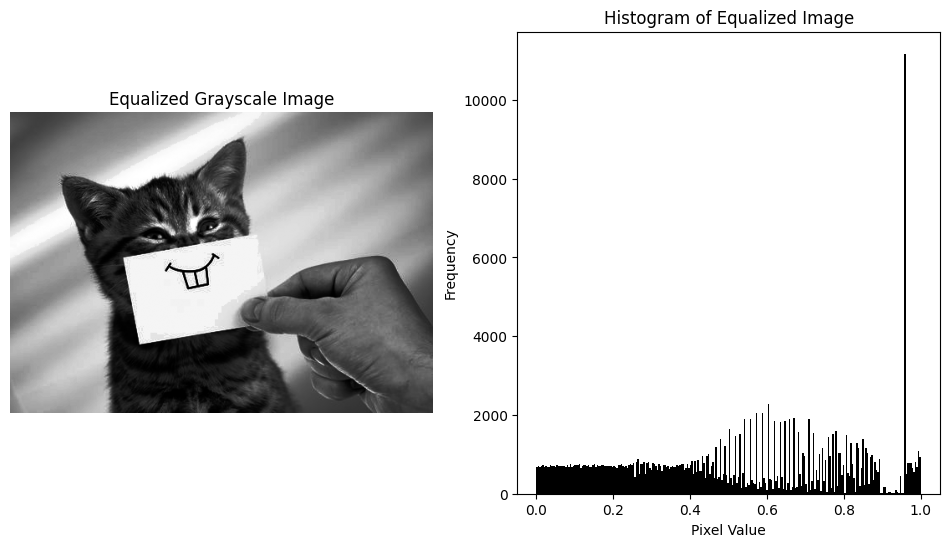

In [43]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray, display the image along with its histogram

I_recon_gray = exposure.equalize_hist(I_degraded)

### BEGIN SOLUTION
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(I_recon_gray, cmap='gray')
plt.title("Equalized Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(I_recon_gray.ravel(), bins=256, range=(0, 1), color='black')
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()
### END SOLUTION

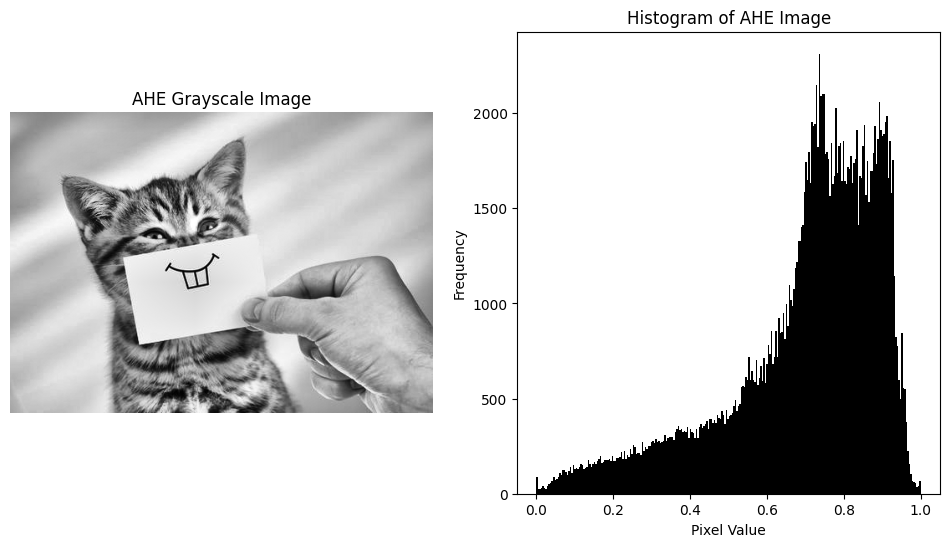

In [44]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_2 = exposure.equalize_adapthist(I_degraded)

### BEGIN SOLUTION
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(I_recon_gray_2, cmap='gray')
plt.title("AHE Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(I_recon_gray_2.ravel(), bins=256, range=(0, 1), color='black')
plt.title("Histogram of AHE Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()
### END SOLUTION

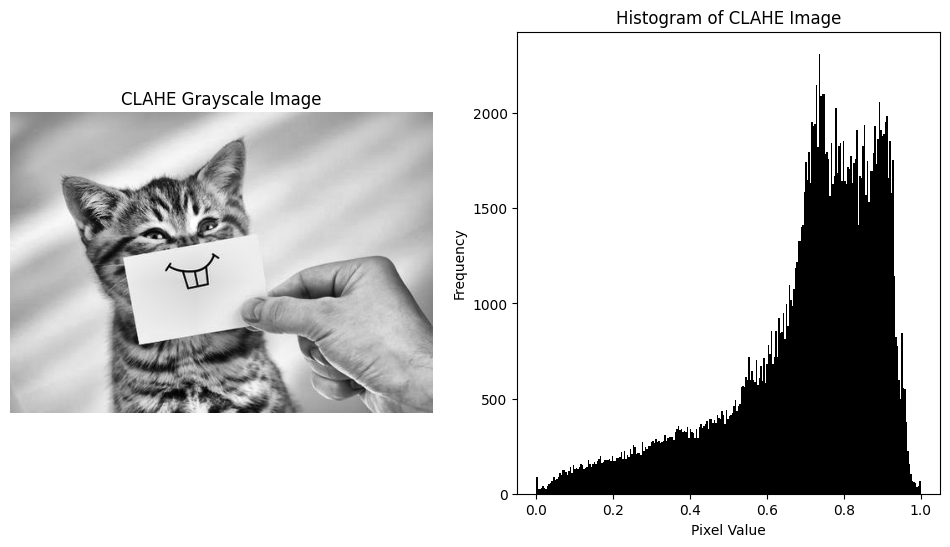

In [45]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_3 = exposure.equalize_adapthist(I_degraded)


### BEGIN SOLUTION
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(I_recon_gray_3, cmap='gray')
plt.title("CLAHE Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(I_recon_gray_3.ravel(), bins=256, range=(0, 1), color='black')
plt.title("Histogram of CLAHE Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()
### END SOLUTION

<ipython-input-52-8e5cbfbff8a9>:10: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 5 negative Z values that have been clipped to zero
  I_rgb_degraded = color.lab2rgb(I_lab)


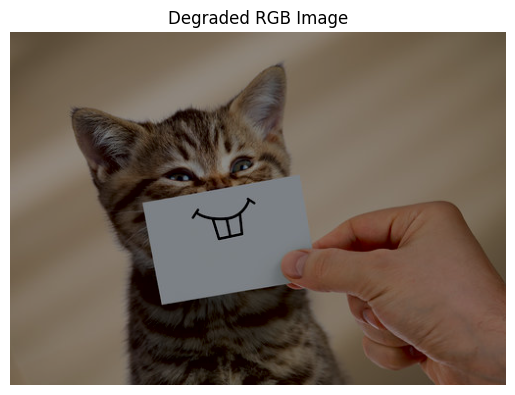

In [52]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space)
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it

I_lab = rgb2lab(I)

I_lab[:, :, 0] = np.clip((I_lab[:, :, 0] - 30) * (60 / 70), 0, 100)

I_rgb_degraded = color.lab2rgb(I_lab)

### BEGIN SOLUTION
plt.imshow(I_rgb_degraded)
plt.title("Degraded RGB Image")
plt.axis('off')
plt.show()
### END SOLUTION

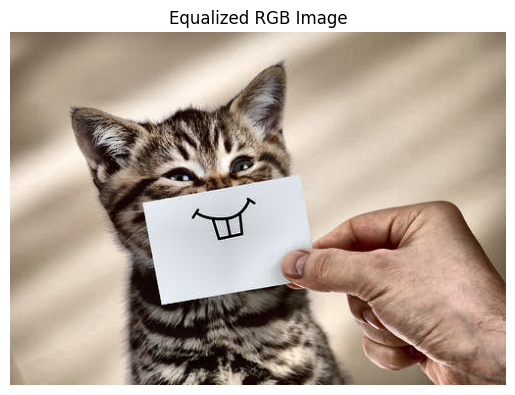

In [53]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-4-demo-codes
I_lab_degraded = color.rgb2lab(I_rgb_degraded)
I_lab_degraded[:, :, 0] = exposure.equalize_adapthist(I_lab_degraded[:, :, 0] / 100) * 100
I_recon_color = color.lab2rgb(I_lab_degraded)

### BEGIN SOLUTION
plt.imshow(I_recon_color)
plt.title("Equalized RGB Image")
plt.axis('off')
plt.show()
### END SOLUTION

# Task 3 - Open Ended
 ## ***There are 3 images in the drive directory below. Look at the questions from the brackets [.]. Answer them in the provided text cell at the bottom.***

 ### link:  https://drive.google.com/drive/folders/17gJVozfyj7cGzLvjLfzmc_ii1qYj-ZeU?usp=sharing

/usr/local/lib/python3.11/dist-packages/skimage/_shared/utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


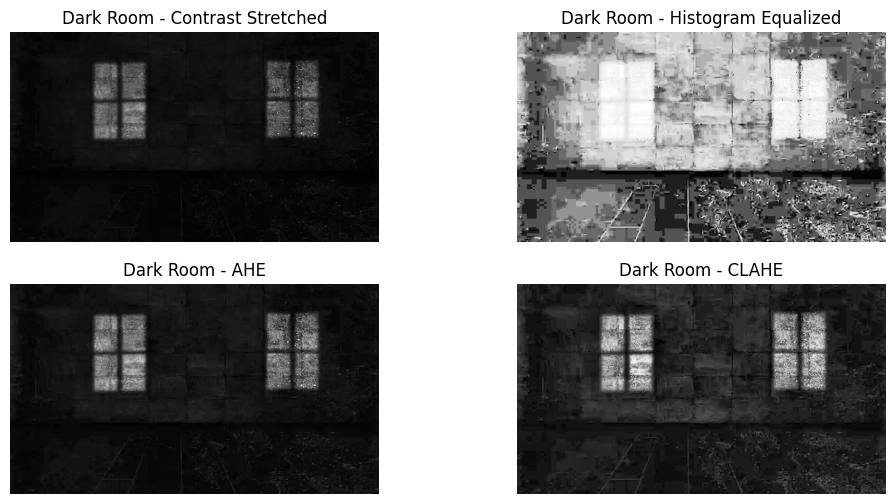

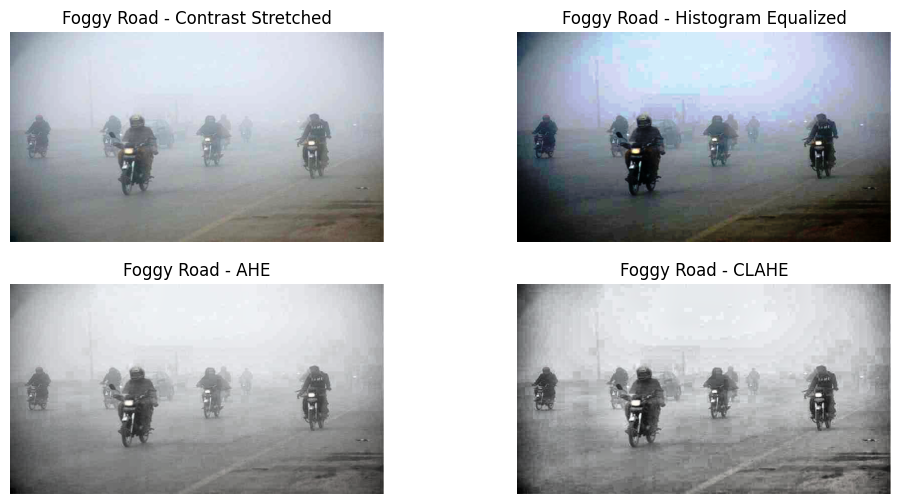

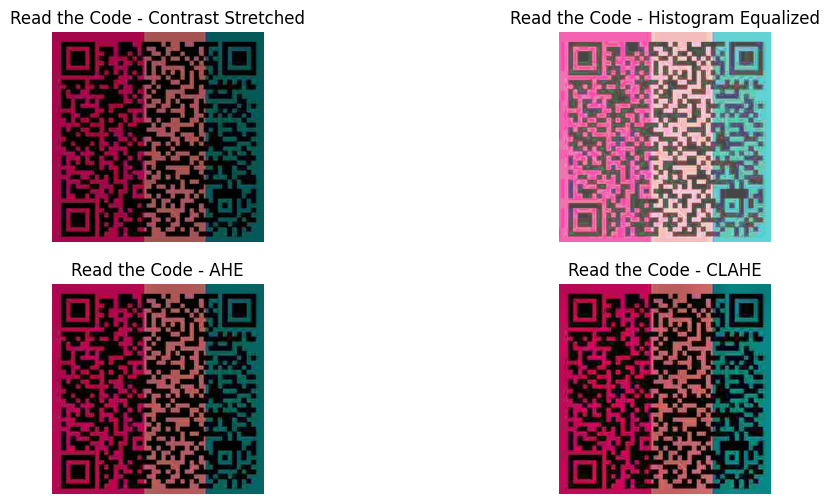

In [56]:
# Dark_Room.jpg = very dark [The windows are on walls. How does the wall look like?]
# Foggy_Road.jpg = washed out/foggy [How many vehicles do you think there are?]
# Read_the_code.jpg = Dark RGB Barcode [What is hidden in the Barcode?
#                                       Make it scanable, scan it and say something about the hidden message.]

# Your task is to improve these images using
# contrast stretching, histogram equalization, AHE or CLAHE
# try different combination of parameter settings to see which produces the best result

## BEGIN SOLUTION

dark_room = io.imread('Dark_Room.jpg')
foggy_road = io.imread('Foggy_Road.jpg')
read_the_code = io.imread('Read_the_code.jpg')

# Normalize the images to [0, 1]
dark_room = dark_room / 255
foggy_road = foggy_road / 255
read_the_code = read_the_code / 255

#dark room
dark_room_stretched = exposure.rescale_intensity(dark_room)
dark_room_equalized = exposure.equalize_hist(dark_room)
dark_room_ahe = exposure.equalize_adapthist(dark_room)
dark_room_clahe = exposure.equalize_adapthist(dark_room, clip_limit=0.03)


plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(dark_room_stretched)
plt.axis('off')
plt.title("Dark Room - Contrast Stretched")

plt.subplot(2, 2, 2)
plt.imshow(dark_room_equalized)
plt.axis('off')
plt.title("Dark Room - Histogram Equalized")

plt.subplot(2, 2, 3)
plt.imshow(dark_room_ahe)
plt.axis('off')
plt.title("Dark Room - AHE")

plt.subplot(2, 2, 4)
plt.imshow(dark_room_clahe)
plt.axis('off')
plt.title("Dark Room - CLAHE")
plt.show()

#foggy road
foggy_road_stretched = exposure.rescale_intensity(foggy_road)
foggy_road_equalized = exposure.equalize_hist(foggy_road)
foggy_road_ahe = exposure.equalize_adapthist(foggy_road)
foggy_road_clahe = exposure.equalize_adapthist(foggy_road, clip_limit=0.03)


plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(foggy_road_stretched)
plt.axis('off')
plt.title("Foggy Road - Contrast Stretched")

plt.subplot(2, 2, 2)
plt.imshow(foggy_road_equalized)
plt.axis('off')
plt.title("Foggy Road - Histogram Equalized")

plt.subplot(2, 2, 3)
plt.imshow(foggy_road_ahe)
plt.axis('off')
plt.title("Foggy Road - AHE")

plt.subplot(2, 2, 4)
plt.imshow(foggy_road_clahe)
plt.axis('off')
plt.title("Foggy Road - CLAHE")
plt.show()

#code reading
read_the_code_stretched = exposure.rescale_intensity(read_the_code)
read_the_code_equalized = exposure.equalize_hist(read_the_code)
read_the_code_ahe = exposure.equalize_adapthist(read_the_code)
read_the_code_clahe = exposure.equalize_adapthist(read_the_code, clip_limit=0.03)


plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(read_the_code_stretched)
plt.axis('off')
plt.title("Read the Code - Contrast Stretched")

plt.subplot(2, 2, 2)
plt.imshow(read_the_code_equalized)
plt.axis('off')
plt.title("Read the Code - Histogram Equalized")

plt.subplot(2, 2, 3)
plt.imshow(read_the_code_ahe)
plt.axis('off')
plt.title("Read the Code - AHE")

plt.subplot(2, 2, 4)
plt.imshow(read_the_code_clahe)
plt.axis('off')
plt.title("Read the Code - CLAHE")
plt.show()

## END SOLUTION
### END SOLUTION

### Your answers:

abc abc abc ... ...

In [ ]:
1.dark room ==  image appears very dark, with low contrast and poor visibility.The details of the wall are barely visible due to the lack of brightness and contrast. after using contrast stretching, histogram equalization,ahe or clahe the wall becomes more visible, and the texture and details of the wall are enhanced.


2. foggy road == he fog makes it difficult to identify the exact number of vehicles. Initially, it appears 5 motocycles and 1 car but after using contrast stretching, histogram equalization,ahe or clahe it becomes clear and i can see 7 motocycles and 1 car.

3. barcode == mage contains a dark barcode that is not easily scannable due to low contrast and poor lighting. After applying contrast stretching or clashe, the barcode becomes more visible and scannable. Once scanned, the barcode reveals a hidden message, which is:CSE428: Image Processing.  Theory references and practice problems.

